In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

NUM_EPOCHS = 20
BATCH_SIZE = 200
LEARNING_RATE = 0.001

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [81]:
"""
Load the MNIST data. Split into train and test sets.
"""

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

Labeled as: 4


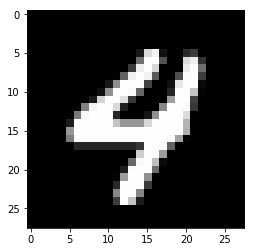

In [87]:
"""
Helper functions to view images.
"""

def imshow(img):
    img = img / 2 + 0.5     # unnormalize - corresponds to transformation above.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[0]))
print('Labeled as:', labels[0].item())

In [83]:
"""
Define Model
"""

class MNISTModel(nn.Module):
    
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.l1= nn.Linear(28*28, 200)
        self.l2 = nn.Linear(200, 200)
        self.l3 = nn.Linear(200, 200)
        self.l4 = nn.Linear(200, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = self.l4(x)
        x = F.log_softmax(x, dim=1)
        
        return x

In [84]:
"""
Instantiate a MNISTModel to be trained
"""

model = MNISTModel().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

In [85]:
"""
Train model
"""

for epoch in range(0, NUM_EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)

        optimizer.zero_grad()

        preds = model(inputs)
        loss = criterion(preds, targets)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print('Epoch: %d | loss: %.3f' % (epoch + 1, running_loss / 5000))

Epoch: 1 | loss: 0.027
Epoch: 2 | loss: 0.011
Epoch: 3 | loss: 0.008
Epoch: 4 | loss: 0.006
Epoch: 5 | loss: 0.005
Epoch: 6 | loss: 0.004
Epoch: 7 | loss: 0.004
Epoch: 8 | loss: 0.004
Epoch: 9 | loss: 0.003
Epoch: 10 | loss: 0.003
Epoch: 11 | loss: 0.002
Epoch: 12 | loss: 0.002
Epoch: 13 | loss: 0.002
Epoch: 14 | loss: 0.002
Epoch: 15 | loss: 0.002
Epoch: 16 | loss: 0.002
Epoch: 17 | loss: 0.001
Epoch: 18 | loss: 0.001
Epoch: 19 | loss: 0.001
Epoch: 20 | loss: 0.001
Epoch: 21 | loss: 0.001
Epoch: 22 | loss: 0.001
Epoch: 23 | loss: 0.001
Epoch: 24 | loss: 0.001
Epoch: 25 | loss: 0.001


In [86]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, targets = data
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)

        preds = model(inputs)
        _, predicted = torch.max(preds.data, 1) # max of logits
        
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


Accuracy of the network on the test images: 97 %
